# NB2.2B Linear Regression

In this study case, you will look at the relationship  between anatomical features in mamas. The data is available at  http://dx.doi.org/10.6084/m9.figshare.1565651 as well as at http://www.statsci.org/data/general/sleep.html.

It includes 6 feature for 62 species of mammals

* BodyWt: body weight (kg).
* BrainWt: brain weight (g).
* NonDreaming: slow wave ("nondreaming") sleep (hrs/day).
* Dreaming: paradoxical ("dreaming") sleep (hrs/day).
* TotalSleep: total sleep, sum of slow wave and paradoxical sleep (hrs/day).
* LifeSpan: maximum life span (years).
* Gestation: gestation time (days).
* Predation: predation index (1-5) 1 = minimum (least likely to be preyed upon); 5 = maximum (most likely to be preyed upon).
* Exposure: sleep exposure index (1-5) 1 = least exposed (e.g. animal sleeps in a well-protected den); 5 = most exposed.
* Danger: overall danger index (1-5) (based on the above two indices and other information) 1 = least danger (from other animals); 5 = most danger (from other animals).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
from IPython.display import display, Math
# plt.rcParams["figure.figsize"] = (15,10)

In [2]:
def MPE(y_real, y_predicted):
    """
    Dosctring
    Function to compute the Mean Percentage Error only accepts numpy arrays
    
    input 
    y_real: real values of the predicted variable
    y_predicted: predicted values of the predicted variable
    
    output
    return the Mean precentage error on percentages without %
    
    """
    n = len(y_real)
    
    mpe = (100 * round((1/n) * sum((y_real- y_predicted)/y_real), 5))
    
    return mpe

## 1. Linear Model Regression

**T1** Load the data into a Pandas dataframe and create a scatter plot of the `Brain Weight` vs `Body Weight`.

In [3]:
data = pd.read_csv("http://www.statsci.org/data/general/sleep.txt", sep = '\t')
data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      62 non-null     object 
 1   BodyWt       62 non-null     float64
 2   BrainWt      62 non-null     float64
 3   NonDreaming  48 non-null     float64
 4   Dreaming     50 non-null     float64
 5   TotalSleep   58 non-null     float64
 6   LifeSpan     58 non-null     float64
 7   Gestation    58 non-null     float64
 8   Predation    62 non-null     int64  
 9   Exposure     62 non-null     int64  
 10  Danger       62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


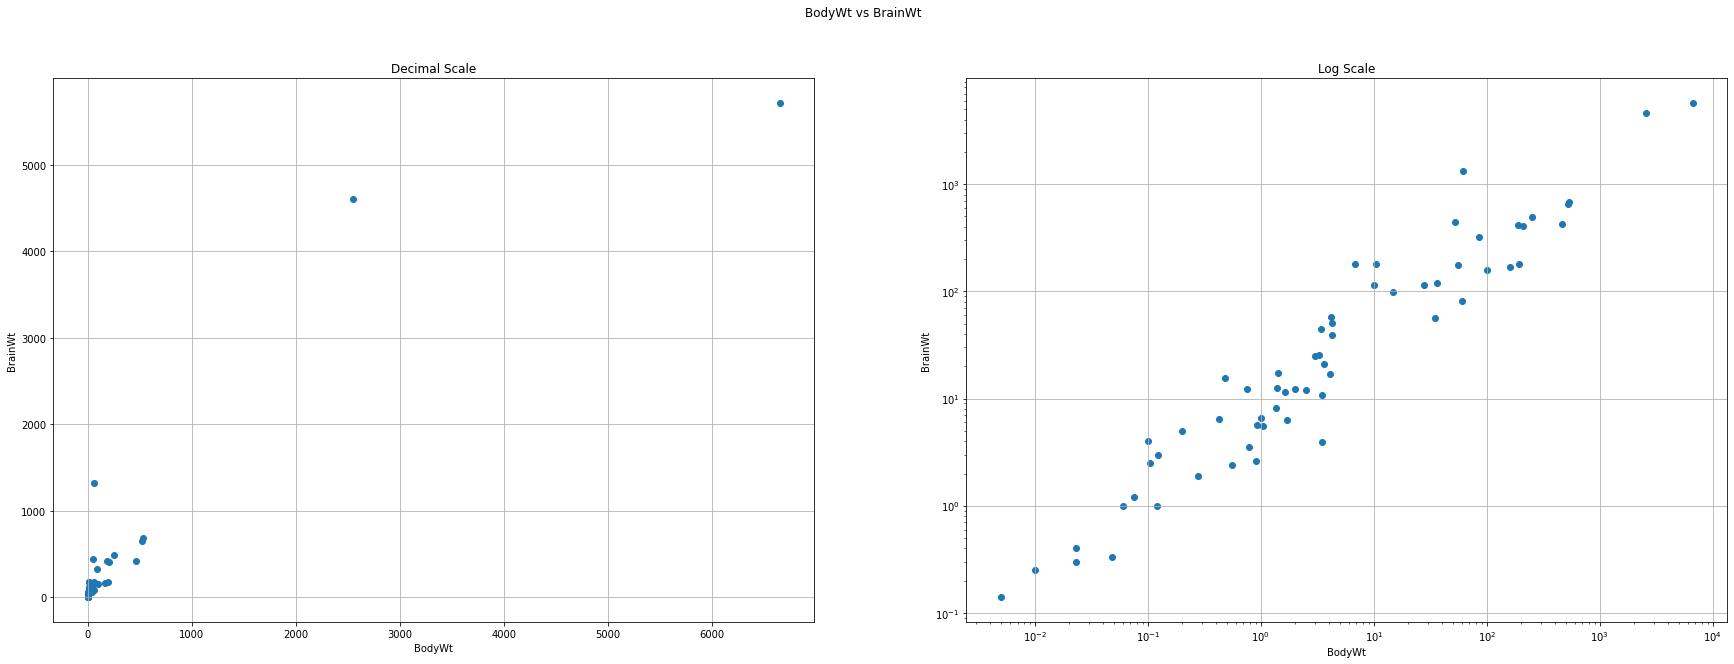

In [5]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize = (30,10))

ax.scatter(data.BodyWt, data.BrainWt)
ax.set_xlabel('BodyWt')
ax.set_ylabel('BrainWt')
ax.set_title("Decimal Scale")
ax.grid()

ax2.scatter(data.BodyWt, data.BrainWt)
ax2.set_title("Log Scale")
ax2.set_xlabel('BodyWt')
ax2.set_ylabel('BrainWt')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid()

fig.suptitle("BodyWt vs BrainWt")
fig.savefig("BodyWt vs BrainWt")
plt.show()

We noticed that when we created the regular scatter plot, the data was so small, we couldn't really notice the tendency of the variables. So we had to fit the scatterplot into a logarithmic scale, where we can see a tendency, and the values start making sense graphically.

**T2** Fit a linear regression model considering `BrainWt` as target variable and `BodyWt`as the input variable. Fit the model to 80% of the data (train set) and evaluate the model with the remaining data. Print the following:
* Model Equation.
* Appropiate Metric for Evaluation (RMSE, $R^2$ and MPE). Make a conclusion based on the values of the metrics.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data.BodyWt.values, data.BrainWt.values, train_size = .80)
lin_reg = linear_model.LinearRegression()
x_train = np.reshape(x_train, (len(x_train),1 ))
x_test = np.reshape(x_test, (len(x_test), 1))

In [7]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [8]:
lin_reg.coef_

array([0.9645344])

In [9]:
lin_reg.intercept_

98.85747998140118

#### Model equation

In [10]:
display(Math(r'y= {} + {}x'.format(lin_reg.intercept_,lin_reg.coef_[0])))

<IPython.core.display.Math object>

In [11]:
y_pred = lin_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

83.75202905882908

In [12]:
r2_score(y_test, y_pred)

0.8736506069695607

In [13]:
MPE(y_test, y_pred)

-2704.402

Conclusion on evaluation metrics Root Mean Squared Error (RMSE), R Squared and Mean Percentage Error (MPE):

The RMSE has a really high value compared to our variables, therefore we can consider that the model is overfitted. The R Squared on the other hand, signals a negative value, (usually between 0 and 1 but sklearn allows for more values to take place) which also signals us that overfitting is in place. Finally, the MPE implies a negative bias, therefore, the prediction seems to be overestimating the values. We can conclude that all of our metrics point towards an overfitting model, there are many causes for this, but the main one we consider is the fact that we have a small amount of data.

**T3** Create a scatter plot of the `Brain Weight` vs `Body Weight` including the regression line.

In [14]:
x_axis_reg = np.linspace(0, max(data.BodyWt), 1000)
x_axis_reg = np.reshape(x_axis_reg, (len(x_axis_reg),1))
y_axis_reg = lin_reg.predict(x_axis_reg)

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

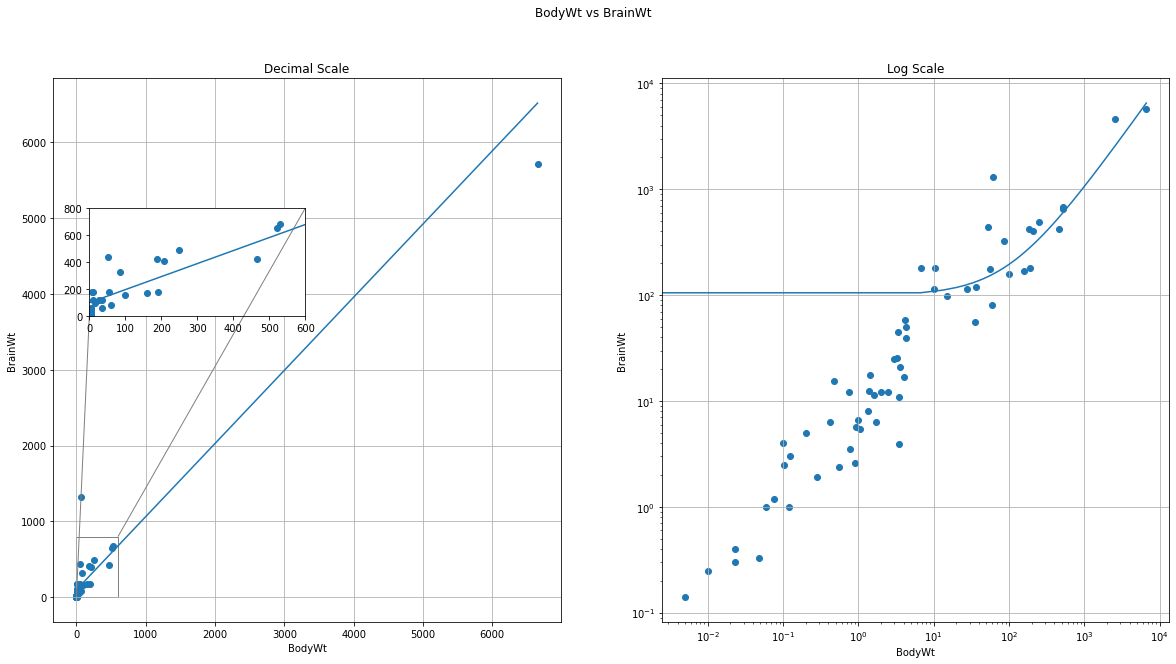

In [16]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize = (20,10))

# axins = inset_axes()
axins = plt.axes([.15, .55, 0.15, 0.15])

ax.scatter(data.BodyWt, data.BrainWt)
ax.plot(x_axis_reg, y_axis_reg)

# axins = zoomed_inset_axes(ax, zoom = 7.5, bbox_to_anchor=(0.95,0.5), bbox_transform=ax.transAxes)

axins.scatter(data.BodyWt, data.BrainWt)
axins.plot(x_axis_reg, y_axis_reg)

axins.set_xlim([0,600])
axins.set_ylim([0,800])


ax.set_xlabel('BodyWt')
ax.set_ylabel('BrainWt')
ax.set_title("Decimal Scale")

ax.grid()

mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
# mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")


ax2.scatter(data.BodyWt, data.BrainWt)
ax2.plot(x_axis_reg, y_axis_reg)
ax2.set_title("Log Scale")
ax2.set_xlabel('BodyWt')
ax2.set_ylabel('BrainWt')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid()

fig.suptitle("BodyWt vs BrainWt")
fig.savefig("BodyWt vs BrainWt_2")
plt.show()

## 2. Logarithmic Transformation

In order to improve the model performance, we can apply transformation to the data. It will allow to obtain a high order relation between the variables instead just a simple relation as you can observe in **T3**. Once the linear model is obtained, we can undo the transformation to obtain the final model.

**T4** Apply a logarithmic transformation to both of the variables. Create two new columns in the dataframe. You can name it by using the prefix "log_", i.e. `log_BodyWt` and `log_BrainWt`. Create a scatter plot between both transformed variables.

In [17]:
log = lambda x: np.log(x)

In [18]:
data["log_BodyWt"] = data.BodyWt.apply(log)
data["log_BrainWt"] = data.BrainWt.apply(log)

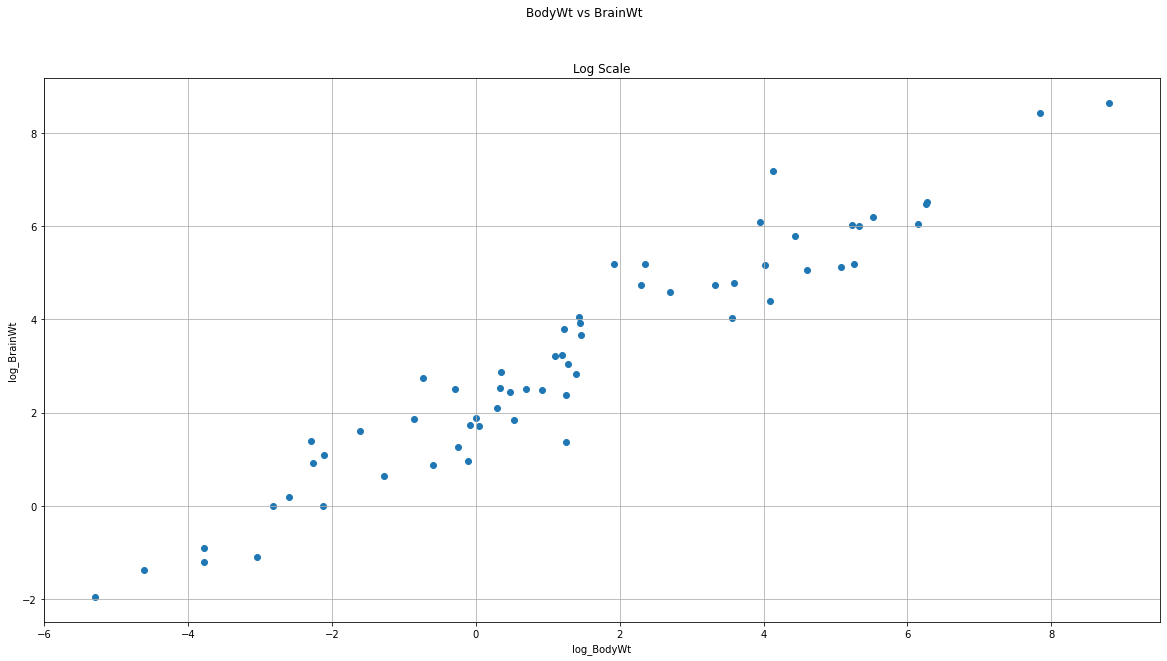

In [19]:
fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(data.log_BodyWt, data.log_BrainWt)
ax.set_xlabel('log_BodyWt')
ax.set_ylabel('log_BrainWt')
ax.set_title("Log Scale")
ax.grid()

fig.suptitle("BodyWt vs BrainWt")
fig.savefig("BodyWt vs BrainWt_3")
plt.show()

Based on **T4**, you can observe that the scatter plot indicates a linear relationship in the transformed space. Let $y$ and $x$ be the `Brain Weight` vs `Body Weight`, the relationship between this data can be modelled as a *power law*.
$$
y = A x ^\gamma
$$
where $\gamma$ is a constant. The log-log transformation maps this nonlinear relationship to a linear one:
$$
log(y) = log( A x^\gamma)
$$

$$
log(y) = log (x^\gamma) + log (A)
$$

$$
log(y) = \gamma log(x) + log(A)
$$

Let $y'$ and $x'$ be the logarithm of the `BrainWt` vs `BodyWt`. Observe that those variables are `log_BrainWt`and `log_BodyWt`, respectively. 

It is possible to transformed the power law model into a form that looks like a linear regression:
$$
y' = M x' + B
$$
where $M = \gamma$ and $B = log(A)$. 

**T5** Fit a new model using the transformed features, i.e. use `log_BrainWt` as input variable and `log_BodyWt` as output variable. Split the data into a train (80%) and test set (20%. Fit the model to train set and evaluate it with the test set. Print the following:
* Model Equation given by:
$$
Brain = A (Body)^\gamma
$$
Give the approate value for $A$ and $\gamma$.
* Appropiate Metric for Evaluation (RMSE, $R^2$ and MPE). Make a conclusion based on the values of the metrics.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data.log_BodyWt.values, data.log_BrainWt.values, train_size = .80)
log_reg = linear_model.LinearRegression()
x_train = np.reshape(x_train, (len(x_train),1 ))
x_test = np.reshape(x_test, (len(x_test), 1))

In [21]:
log_reg.fit(x_train, y_train)

LinearRegression()

In [22]:
log_reg.coef_

array([0.76578945])

In [23]:
log_reg.intercept_

2.092583884899221

#### Model equation 

In [24]:
display(Math(r'y = {}x^{{{}}}'.format(round(log_reg.intercept_,3),round(log_reg.coef_[0], 3))))

<IPython.core.display.Math object>

In [25]:
y_pred = log_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6389951691011305

In [26]:
r2_score(y_test, y_pred)

0.9298493874965612

In [27]:
MPE(y_test, y_pred)

15.641

Conclusion on evaluation metrics Root Mean Squared Error (RMSE), R Squared and Mean Percentage Error (MPE):

The RMSE has a low value compared to our variables, which indicates, decent modeling, not overfitting. The R Squared on the other hand, signals a positive value, also, not overfitting. Finally, the MPE gives us a small value positive value (it could give us an infinite value, depending on the prediction) which indicates, some underfitting, but overall way better than the first raw model. We can now, see the change between scales with numbers, not just graphically.

**T6** Create a scatter plot of the Brain Weight vs Body Weight including the simple linear model and the regression with log transformation.

In [29]:
x_axis_reg = np.linspace(0, max(data.BodyWt), 1000)
x_axis_reg = np.reshape(x_axis_reg, (len(x_axis_reg),1))
y_axis_reg = lin_reg.predict(x_axis_reg)

In [30]:
x_axis_log = np.linspace(min(data.log_BodyWt), max(data.log_BrainWt), 1000)
x_axis_log = np.reshape(x_axis_log, (len(x_axis_log),1))
y_axis_log = log_reg.predict(x_axis_log)

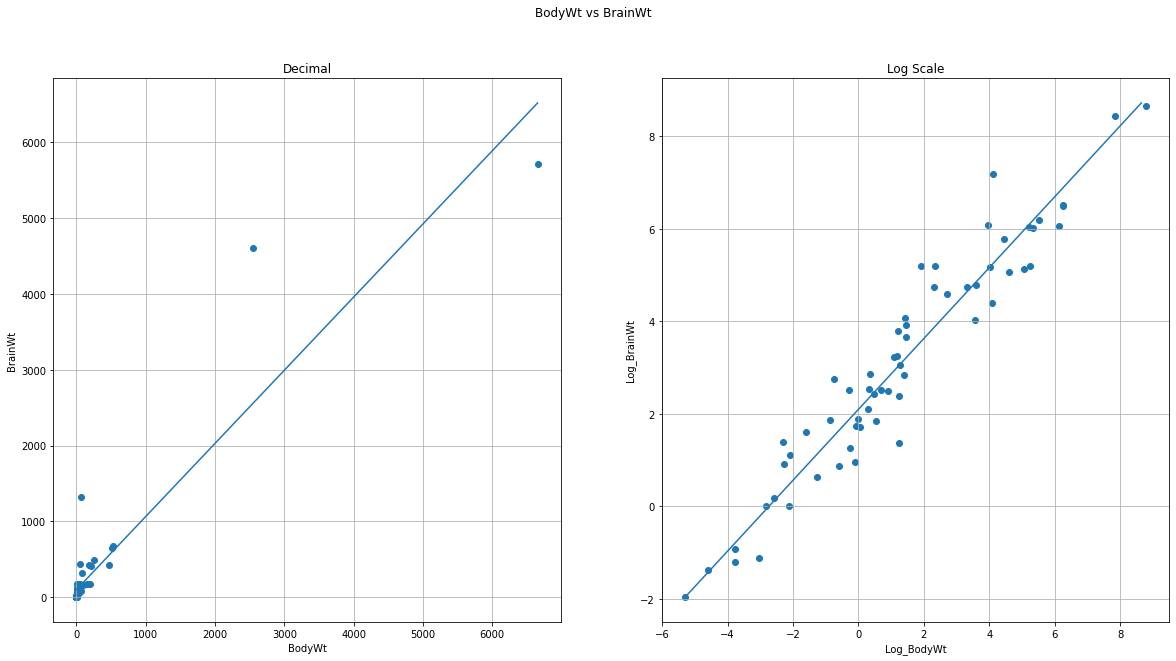

In [31]:
# plt.plot(x_axis_log, y_axis_log)
# plt.scatter(data.BodyWt, data.BrainWt)
# plt.show()

fig, (ax, ax2) = plt.subplots(ncols=2, figsize = (20,10))

ax.plot(x_axis_reg, y_axis_reg)
ax.scatter(data.BodyWt, data.BrainWt)
ax.set_xlabel('BodyWt')
ax.set_ylabel('BrainWt')
ax.set_title("Decimal")
ax.grid()

ax2.plot(x_axis_log, y_axis_log)
ax2.scatter(data.log_BodyWt, data.log_BrainWt)
ax2.set_xlabel('Log_BodyWt')
ax2.set_ylabel('Log_BrainWt')
ax2.set_title("Log Scale")
ax2.grid()

fig.suptitle("BodyWt vs BrainWt")
fig.savefig("BodyWt vs BrainWt_4")
plt.show()

## 4. Polynomial Regression

In the previous sections, we have created two models: one considering a linear relationship between variables and the second, a power law. In fact, we can try fitting different models using more complex functions. 

In order to create a quadratic model, the following expression must be considered:
$$y = \beta_0 + \beta_1 x + \beta_2 x^2\$$
where y and x are the `BrainWt` and `BodyWt` respectively. Note that a new varible must be created $x^2$.

**T7** Add a new variable `BodyWt_squared` that corresponds to the square of `BodyWt`. 

In [32]:
squared = lambda x: x**2
data["BodyWt_squared"] = data.BodyWt.apply(squared)
data.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger,log_BodyWt,log_BrainWt,BodyWt_squared
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,8.802973,8.650325,4.427572e+07
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0.000000,1.887070,1.000000e+00
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,1.219354,3.795489,1.145822e+01
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,-0.083382,1.740466,8.464000e-01
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,7.842671,8.434464,6.487209e+06


**T8** Fit a linear model considering `BrainWt`as the target variable and `BodyWt`and `BodyWt_squared` as input varialbles. Split the data into a train (80%) and test set (20%). Fit the model to train set and evaluate it with the test set. Print the following:
* Model Equation given by:
$$
Brain = \beta_0 + \beta_1 Body + \beta_2 Body^2
$$
Give the appropiate values for $\beta_0$, $\beta_1$ and $\beta_2$.
* Appropiate Metric for Evaluation (RMSE, $R^2$ and MPE). Make a conclusion based on the values of the metrics.

In [33]:
x = np.reshape(data.BodyWt.values, (len(data.BodyWt.values), 1))
y = np.reshape(data.BodyWt_squared.values, (len(data.BodyWt_squared.values),1))
xy = np.concatenate((x,y),axis = 1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(xy, data.BrainWt.values, train_size = .80)
mult_reg = linear_model.LinearRegression()

In [35]:
mult_reg.fit(x_train, y_train)
mult_reg.coef_

array([ 2.12880013e+00, -1.90292941e-04])

In [36]:
mult_reg.intercept_

21.88390323747035

#### Model equation

In [37]:
display(Math(r'y= {} + {}x + {}x^2'.format(mult_reg.intercept_,mult_reg.coef_[0], mult_reg.coef_[0])))

<IPython.core.display.Math object>

In [38]:
y_pred = mult_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

67.5849497180919

In [39]:
r2_score(y_test, y_pred)

-0.12016018229467695

In [40]:
MPE(y_test, y_pred)

-1019.515

Conclusion on evaluation metrics Root Mean Squared Error (RMSE), R Squared and Mean Percentage Error (MPE):

Using the quadratic model the RMSE has a high value compared to our variables, therefore we can consider that the model tends to overfit. The R Squared on the other hand, signals a negative value, (usually between 0 and 1 but sklearn allows for more values to take place) which also signals us that overfitting is in place, although not as bad as our first linear model. Finally, the MPE implies a negative bias, therefore, the prediction seems to be overestimating the values. We can conclude that all of our metrics point towards an overfitting model, there are many causes for this, but the main one we consider, as we've seen before, is the fact that we have a small amount of data. It's curious to notice that although the r squared and MPE score are pretty similar to the first one, the RMSE is more than just "slightly" different.

**T9** Create a scatter plot of the Brain Weight vs Body Weight including the simple linear model, the regression with log transformation and the quadratic model.

In [41]:
x_axis_mult = np.linspace(0, max(data.BodyWt), 100)
x1 = np.copy(x_axis_mult)
x1 = x1 * x1
x2 = np.copy(x_axis_mult)
x_axis_mult = np.reshape(x_axis_mult, (len(x_axis_mult),1))
x_axis_mult = np.insert(x_axis_mult,1, x1, axis = 1)
y_axis_mult = mult_reg.predict(x_axis_mult)

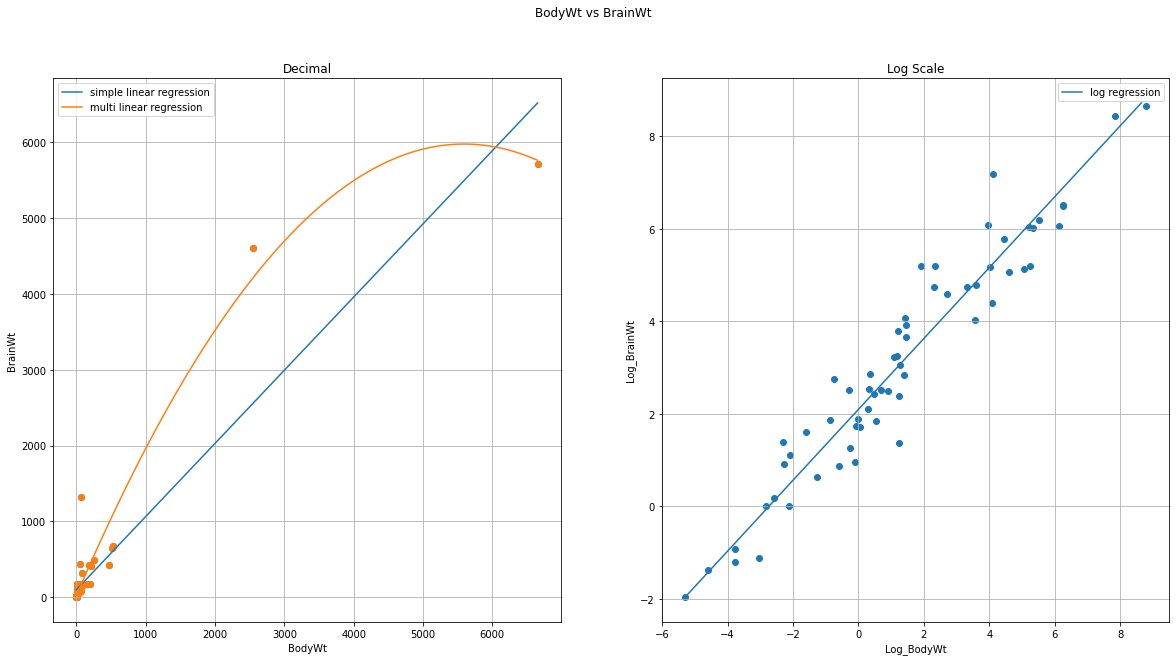

In [42]:
fig, (ax, ax2) = plt.subplots(ncols=2, figsize = (20, 10))


ax.plot(x_axis_reg, y_axis_reg, label = "simple linear regression")
ax.scatter(data.BodyWt, data.BrainWt)
ax.plot(x2, y_axis_mult, label = "multi linear regression")
ax.scatter(data.BodyWt, data.BrainWt)
ax.set_xlabel('BodyWt')
ax.set_ylabel('BrainWt')
ax.set_title("Decimal")
ax.grid()
ax.legend()


ax2.plot(x_axis_log, y_axis_log, label = "log regression")
ax2.scatter(data.log_BodyWt, data.log_BrainWt)
ax2.set_xlabel('Log_BodyWt')
ax2.set_ylabel('Log_BrainWt')
ax2.set_title("Log Scale")
ax2.grid()
ax2.legend()

fig.suptitle("BodyWt vs BrainWt")
fig.savefig("BodyWt vs BrainWt_5")
plt.show()

## Final Notes

This notebook is based on *Chapter 4. The Relationship Conundrum: Regression* from:
> Data Science and Analytics with Python (Rogel-Salazar J., 2017).

You can read this chapter if you want additional help but **YOU ARE NOT ALOWEED TO USE statsmoldes** as in the book. Complete this notebook by modelling using *scikit-learn*. 